In [23]:
#Math Part
import numpy as np
import pandas as pd

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

import pandas as pd
import time


In [33]:

def evol(output="bank_testdata.csv"):
    iot_data = pd.read_csv('bank_cleaned.csv').iloc[11500:12000]
    y = iot_data['y'].values
    X = iot_data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=4, depth=3, nparameters=2,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=50,lambda_=10, ngen=10)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
String: 010110000000111100000001101111111110011010011010011000000111
 -> accuracy = 0.94, gates = 13.0,recall =0.0
String: 000100000000110000001110001001010110011111101111000111001110
 -> accuracy = 0.94, gates = 12.0,recall =0.0
String: 110010000100000110100110110010111001011110110110110100100001
 -> accuracy = 0.94, gates = 6.0,recall =0.0
String: 110010001010011000010010110010001011111111000001100000000000
 -> accuracy = 0.94, gates = 13.0,recall =0.0
String: 000111111011111011110111100011111101111011101111001010101010
 -> accuracy = 0.94, gates = 10.0,recall =0.0
String: 110101101001000101001101000111100101010000111011111010101001
 -> accuracy = 0.94, gates = 6.0,recall =0.0
String: 101000000010000100010110000011010110110000011011110000101010
 -> accuracy = 0.94, gates = 9.0,recall =0.0
String: 011110000011101101100110101010010010111011111001010010111101
 -> accuracy = 0.94, gates = 11.0,recall =0.0
String: 111011000000101010101011101110101001100010010100011000011010
 -> accu

d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 100011001001011111000000011101100111111010110101011001100100
 -> accuracy = 0.94, gates = 10.0,recall =0.0
String: 110010100111100000000010101110000101101110011111011000101110
 -> accuracy = 0.94, gates = 10.0,recall =0.0
String: 101110001010101011110010101011010000111001001001110111011100
 -> accuracy = 0.94, gates = 9.0,recall =0.0
String: 001011011100110000100010001100000101010001011100100001100011
 -> accuracy = 0.94, gates = 12.0,recall =0.0
String: 000011111111100110100000000001111011001111110110100010010011
 -> accuracy = 0.94, gates = 11.0,recall =0.0
String: 001101000010101011100000001001100100000101100101100010011000
 -> accuracy = 0.94, gates = 10.0,recall =0.0
String: 010100100010010110011000101111111101011000000110000111000001
 -> accuracy = 0.94, gates = 7.0,recall =0.0
String: 011000100010111110010110000000010110010001100111010110111101
 -> accuracy = 0.94, gates = 9.0,recall =0.0
String: 110010001101110000100010010111011110010010101110011110000110
 -> accuracy =

In [26]:
import encoding2 as e2
import random

iot_result = pd.read_csv('bank_testdata.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,acc
0,3,1110000011010001110101010110111100111010010011...,0.945793,0.510938
1,1,0101111111010100100111100110111010110111010111...,0.929387,0.489063
2,2,1010010110010000111001010010011110010110010011...,0.929387,0.489063
3,0,1010010110111011010111010000001000011010101000...,0.925964,0.484375


['11100', '00011', '01000', '11101', '01010', '11011', '11001', '11010', '01001', '11000', '10100', '10110']
3.0


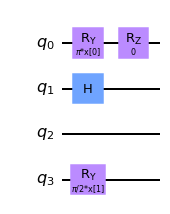

In [27]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
#from qiskit.aqua import QuantumInstance
def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

import os
import psutil

class Fitness:

    def __init__(self, nqubits, nparameters, X, y, quantum_instance):
        self.nqubits = nqubits
        self.nparameters = nparameters
        self.cc = CircuitConversor(nqubits, nparameters)
        self.instance = quantum_instance
        self.X = X
        self.y = y

    def __call__(self, POP):
        try:
            return self.fitness(POP)
        except Exception as e:
            print(f'Exception happened during fitness():\n  {e}')
            process = psutil.Process(os.getpid())
            print(f'  RUSAGE_SELF: {process.memory_info()}')
        return 1000, 100000.0

    def fitness(self, POP):
        print('Invoked fitness')
        #Convertimos el individuo en el fenotipo (ansatz)
        fm, puertas = self.cc(coding_bits(POP))
        
cc = CircuitConversor(nqubits=4, nparameters=3)
fm, puertas = cc(coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')

In [6]:
iot_data = pd.read_csv('bank_cleaned_pretest.csv')

y = iot_data['y'].values
X = iot_data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values


In [ ]:

train_sample, train_label, test_sample, test_label = fitness.Dataset(X,y)


In [ ]:
cc_0 = encoding.CircuitConversor(nqubits=4, nparameters=1)
fm1, puertas1 = cc_0(iot_salidas.circ[0],np.array([0,1]))
model = qsvm.QSVM(fm,train_sample,train_label)

In [ ]:
puertas1

In [ ]:
banking_data= pd.read_csv('bank_cleaned.csv')
y = banking_data['y'].values
X = banking_data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values

In [ ]:
def ones(y):

    ones = 0
    for i,j in enumerate(y):
        if j == 1 :
            ones+=1
            print(i)
    print(ones/len(y))

In [ ]:
ones(y[:500])

In [ ]:
zeros

In [ ]:
len(y)